<a href="https://colab.research.google.com/github/bharathgoud000/Machine-learning/blob/main/weather_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [107]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [108]:
df = pd.read_csv('/content/drive/MyDrive/datasets/weatherAUS.csv')

In [3]:
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142188,2017-06-20,Uluru,3.5,21.8,0.0,NaN,NaN,E,31.0,ESE,E,15.0,13.0,59.0,27.0,1024.7,1021.2,NaN,NaN,9.4,20.9,No,0.0,No
142189,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,ENE,13.0,11.0,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,0.0,No
142190,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,N,13.0,9.0,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,0.0,No
142191,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,WNW,9.0,9.0,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,0.0,No


In [4]:
df['Date'] = pd.to_datetime(df['Date'])
print(df['Date'].dtypes)
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

datetime64[ns]


In [57]:
df.drop('Date',axis=1,inplace = True)

In [58]:
df['Day']


,Day
0,1
1,2
2,3
3,4
4,5
...,...
142188,20
142189,21
142190,22
142191,23


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 26 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Location       142193 non-null  object 
 1   MinTemp        142193 non-null  float64
 2   MaxTemp        142193 non-null  float64
 3   Rainfall       142193 non-null  float64
 4   Evaporation    142193 non-null  float64
 5   Sunshine       142193 non-null  float64
 6   WindGustDir    142193 non-null  object 
 7   WindGustSpeed  142193 non-null  float64
 8   WindDir9am     142193 non-null  object 
 9   WindDir3pm     142193 non-null  object 
 10  WindSpeed9am   142193 non-null  float64
 11  WindSpeed3pm   142193 non-null  float64
 12  Humidity9am    142193 non-null  float64
 13  Humidity3pm    142193 non-null  float64
 14  Pressure9am    142193 non-null  float64
 15  Pressure3pm    142193 non-null  float64
 16  Cloud9am       142193 non-null  float64
 17  Cloud3pm       142193 non-nul

In [60]:
df.isnull().sum()

,0
Location,0
MinTemp,0
MaxTemp,0
Rainfall,0
Evaporation,0
Sunshine,0
WindGustDir,0
WindGustSpeed,0
WindDir9am,0
WindDir3pm,0


In [61]:
df['MinTemp']=df['MinTemp'].fillna(df['MinTemp'].median())
df['MaxTemp']=df['MaxTemp'].fillna(df['MaxTemp'].median())
df['Rainfall']=df['Rainfall'].fillna(df['Rainfall'].median())
df['Evaporation']=df['Evaporation'].fillna(df['Evaporation'].median())
df['Sunshine']=df['Sunshine'].fillna(df['Sunshine'].median())
df['WindGustSpeed']=df['WindGustSpeed'].fillna(df['WindGustSpeed'].median())
df['WindSpeed9am']=df['WindSpeed9am'].fillna(df['WindSpeed9am'].median())
df['WindSpeed3pm']=df['WindSpeed3pm'].fillna(df['WindSpeed3pm'].median())
df['Humidity9am']=df['Humidity9am'].fillna(df['Humidity9am'].median())
df['Humidity3pm']=df['Humidity3pm'].fillna(df['Humidity3pm'].median())
df['Pressure9am']=df['Pressure9am'].fillna(df['Pressure9am'].median())
df['Pressure3pm']=df['Pressure3pm'].fillna(df['Pressure3pm'].median())
df['Cloud9am']=df['Cloud9am'].fillna(df['Cloud9am'].median())
df['Cloud3pm']=df['Cloud3pm'].fillna(df['Cloud3pm'].median())
df['Temp9am']=df['Temp9am'].fillna(df['Temp9am'].median())
df['Temp3pm']=df['Temp3pm'].fillna(df['Temp3pm'].median())




In [62]:
df["WindDir9am"].unique()

array(['W', 'NNW', 'SE', 'ENE', 'SW', 'SSE', 'S', 'NE', 'N', 'SSW', 'WSW',
       'ESE', 'E', 'NW', 'WNW', 'NNE'], dtype=object)

In [63]:
df["RainToday"].unique()

array(['No', 'Yes'], dtype=object)

In [64]:
df["WindGustDir"] = df["WindGustDir"].fillna(df["WindGustDir"].mode()[0])
df["WindDir9am"] = df["WindDir9am"].fillna(df["WindDir9am"].mode()[0])
df["WindDir3pm"] = df["WindDir3pm"].fillna(df["WindDir3pm"].mode()[0])
df["RainToday"] = df["RainToday"].fillna(df["RainToday"].mode()[0])

In [65]:
df.isnull().sum()

,0
Location,0
MinTemp,0
MaxTemp,0
Rainfall,0
Evaporation,0
Sunshine,0
WindGustDir,0
WindGustSpeed,0
WindDir9am,0
WindDir3pm,0


In [66]:
categorical_columns = ['Location','WindGustDir', 'WindDir9am', 'WindDir3pm','RainToday']
df_cat = pd.get_dummies(data = df,prefix = 'cat', prefix_sep='_',
               columns = categorical_columns,
               drop_first =True,
              dtype='int8')

In [67]:
df_cat.shape

(142193, 115)

In [68]:
df_cat

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RISK_MM,RainTomorrow,Year,Month,Day,cat_Albany,cat_Albury,cat_AliceSprings,cat_BadgerysCreek,cat_Ballarat,cat_Bendigo,cat_Brisbane,cat_Cairns,cat_Canberra,cat_Cobar,cat_CoffsHarbour,cat_Dartmoor,cat_Darwin,cat_GoldCoast,cat_Hobart,cat_Katherine,cat_Launceston,cat_Melbourne,cat_MelbourneAirport,...,cat_NW,cat_S,cat_SE,cat_SSE,cat_SSW,cat_SW,cat_W,cat_WNW,cat_WSW,cat_ENE,cat_ESE,cat_N,cat_NE,cat_NNE,cat_NNW,cat_NW,cat_S,cat_SE,cat_SSE,cat_SSW,cat_SW,cat_W,cat_WNW,cat_WSW,cat_ENE,cat_ESE,cat_N,cat_NE,cat_NNE,cat_NNW,cat_NW,cat_S,cat_SE,cat_SSE,cat_SSW,cat_SW,cat_W,cat_WNW,cat_WSW,cat_Yes
0,13.4,22.9,0.6,4.8,8.5,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,5.0,16.9,21.8,0.0,No,2008,12,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,7.4,25.1,0.0,4.8,8.5,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,5.0,5.0,17.2,24.3,0.0,No,2008,12,2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,12.9,25.7,0.0,4.8,8.5,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,5.0,2.0,21.0,23.2,0.0,No,2008,12,3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,9.2,28.0,0.0,4.8,8.5,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,5.0,5.0,18.1,26.5,1.0,No,2008,12,4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,17.5,32.3,1.0,4.8,8.5,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0.2,No,2008,12,5,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142188,3.5,21.8,0.0,4.8,8.5,31.0,15.0,13.0,59.0,27.0,1024.7,1021.2,5.0,5.0,9.4,20.9,0.0,No,2017,6,20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
142189,2.8,23.4,0.0,4.8,8.5,31.0,13.0,11.0,51.0,24.0,1024.6,1020.3,5.0,5.0,10.1,22.4,0.0,No,2017,6,21,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
142190,3.6,25.3,0.0,4.8,8.5,22.0,13.0,9.0,56.0,21.0,1023.5,1019.1,5.0,5.0,10.9,24.5,0.0,No,2017,6,22,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
142191,5.4,26.9,0.0,4.8,8.5,37.0,9.0,9.0,53.0,24.0,1021.0,1016.8,5.0,5.0,12.5,26.1,0.0,No,2017,6,23,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


<Axes: ylabel='Evaporation'>

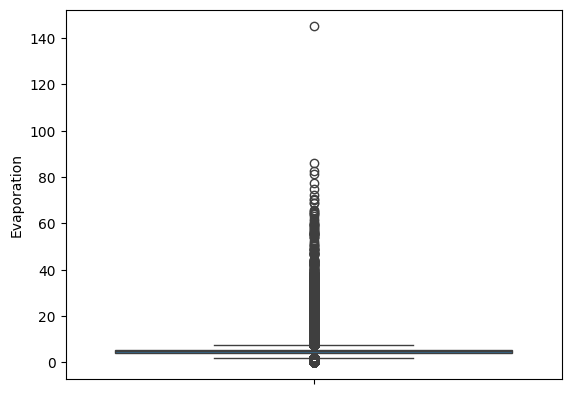

In [69]:
sns.boxplot(df['Evaporation'])

<Axes: ylabel='WindSpeed9am'>

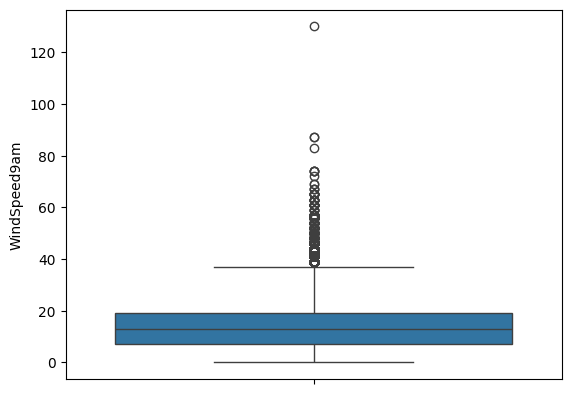

In [70]:
sns.boxplot(df['WindSpeed9am'])

<Axes: ylabel='Rainfall'>

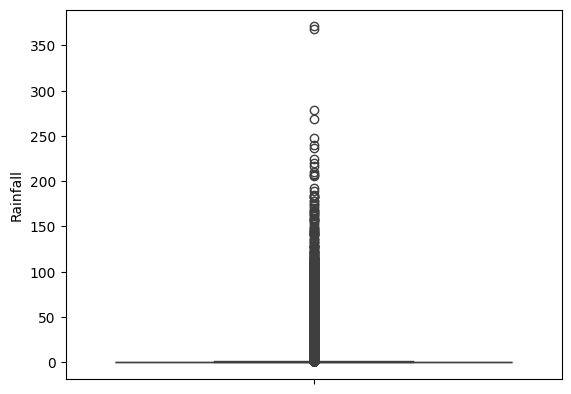

In [71]:
sns.boxplot(df['Rainfall'])

<Axes: ylabel='WindSpeed3pm'>

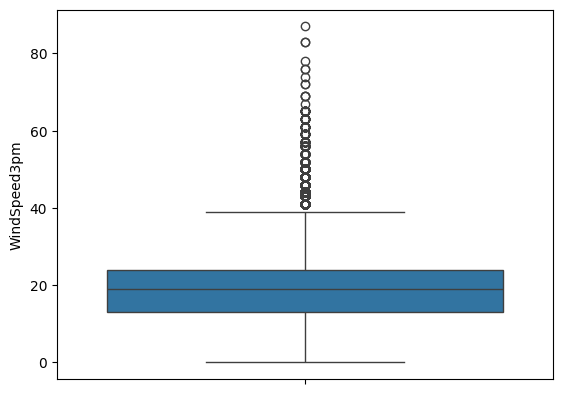

In [72]:
sns.boxplot(df['WindSpeed3pm'])

In [73]:
df_cat.dropna(subset=['RainTomorrow'], inplace=True)

In [87]:
X=df_cat.drop('RainTomorrow',axis=1)
y=df_cat['RainTomorrow']

In [88]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [89]:
Q1 = X_train["Rainfall"].quantile(0.25)
Q3 = X_train["Rainfall"].quantile(0.75)
IQR_Rainfall = Q3 - Q1
lb_rainfall = Q1 - 1.5 * IQR_Rainfall
ub_rainfall = Q3 + 1.5 * IQR_Rainfall
median_rainfall = X_train['Rainfall'].median()
X_train['Rainfall'] = np.where((X_train["Rainfall"]<lb_rainfall) | (X_train["Rainfall"]>ub_rainfall), median_rainfall, X_train["Rainfall"])
X_test['Rainfall'] = np.where((X_test["Rainfall"]<lb_rainfall) | (X_test["Rainfall"]>ub_rainfall), median_rainfall, X_test["Rainfall"])

In [90]:
Q1 = X_train["WindSpeed9am"].quantile(0.25)
Q3 = X_train["WindSpeed9am"].quantile(0.75)
IQR_Rainfall = Q3 - Q1
lb_rainfall = Q1 - 1.5 * IQR_Rainfall
ub_rainfall = Q3 + 1.5 * IQR_Rainfall
median_rainfall = X_train['WindSpeed9am'].median()
X_train['WindSpeed9am'] = np.where((X_train["WindSpeed9am"]<lb_rainfall) | (X_train["WindSpeed9am"]>ub_rainfall), median_rainfall, X_train["WindSpeed9am"])
X_test['WindSpeed9am'] = np.where((X_test["WindSpeed9am"]<lb_rainfall) | (X_test["WindSpeed9am"]>ub_rainfall), median_rainfall, X_test["WindSpeed9am"])

In [91]:
Q1 = X_train["WindSpeed3pm"].quantile(0.25)
Q3 = X_train["WindSpeed3pm"].quantile(0.75)
IQR_Rainfall = Q3 - Q1
lb_rainfall = Q1 - 1.5 * IQR_Rainfall
ub_rainfall = Q3 + 1.5 * IQR_Rainfall
median_rainfall = X_train['WindSpeed3pm'].median()
X_train['WindSpeed3pm'] = np.where((X_train["WindSpeed3pm"]<lb_rainfall) | (X_train["WindSpeed3pm"]>ub_rainfall), median_rainfall, X_train["WindSpeed3pm"])
X_test['WindSpeed3pm'] = np.where((X_test["WindSpeed3pm"]<lb_rainfall) | (X_test["WindSpeed3pm"]>ub_rainfall), median_rainfall, X_test["WindSpeed3pm"])

In [92]:
Q1 = X_train["Evaporation"].quantile(0.25)
Q3 = X_train["Evaporation"].quantile(0.75)
IQR_Rainfall = Q3 - Q1
lb_rainfall = Q1 - 1.5 * IQR_Rainfall
ub_rainfall = Q3 + 1.5 * IQR_Rainfall
median_rainfall = X_train['Evaporation'].median()
X_train['Evaporation'] = np.where((X_train["Evaporation"]<lb_rainfall) | (X_train["Evaporation"]>ub_rainfall), median_rainfall, X_train["Evaporation"])
X_test['Evaporation'] = np.where((X_test["Evaporation"]<lb_rainfall) | (X_test["Evaporation"]>ub_rainfall), median_rainfall, X_test["Evaporation"])

In [93]:
cols = X_train.columns

In [94]:
cols

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm',
       ...
       'cat_NW', 'cat_S', 'cat_SE', 'cat_SSE', 'cat_SSW', 'cat_SW', 'cat_W',
       'cat_WNW', 'cat_WSW', 'cat_Yes'],
      dtype='object', length=114)

In [95]:
from sklearn.preprocessing import MinMaxScaler

In [96]:
X_train

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RISK_MM,Year,Month,Day,cat_Albany,cat_Albury,cat_AliceSprings,cat_BadgerysCreek,cat_Ballarat,cat_Bendigo,cat_Brisbane,cat_Cairns,cat_Canberra,cat_Cobar,cat_CoffsHarbour,cat_Dartmoor,cat_Darwin,cat_GoldCoast,cat_Hobart,cat_Katherine,cat_Launceston,cat_Melbourne,cat_MelbourneAirport,cat_Mildura,...,cat_NW,cat_S,cat_SE,cat_SSE,cat_SSW,cat_SW,cat_W,cat_WNW,cat_WSW,cat_ENE,cat_ESE,cat_N,cat_NE,cat_NNE,cat_NNW,cat_NW,cat_S,cat_SE,cat_SSE,cat_SSW,cat_SW,cat_W,cat_WNW,cat_WSW,cat_ENE,cat_ESE,cat_N,cat_NE,cat_NNE,cat_NNW,cat_NW,cat_S,cat_SE,cat_SSE,cat_SSW,cat_SW,cat_W,cat_WNW,cat_WSW,cat_Yes
118102,3.8,21.1,0.0,2.4,9.7,19.0,0.0,11.0,74.0,38.0,1026.9,1023.9,1.0,0.0,11.7,20.2,0.0,2009,7,31,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
18630,13.7,23.5,0.2,4.8,8.5,31.0,7.0,11.0,81.0,39.0,1008.6,1004.9,5.0,5.0,17.1,22.6,0.0,2011,10,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
127854,2.8,16.5,0.0,3.4,11.1,41.0,19.0,9.0,55.0,41.0,1018.2,1016.9,5.0,5.0,8.7,15.6,0.0,2011,10,25,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
112595,15.0,29.0,0.0,4.8,5.7,59.0,30.0,28.0,35.0,20.0,1012.0,1008.4,5.0,5.0,22.3,28.5,7.0,2010,12,19,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
108492,16.3,32.0,0.0,5.4,12.9,39.0,4.0,19.0,80.0,52.0,1015.5,1014.7,0.0,5.0,21.0,21.1,0.0,2016,2,5,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110268,9.0,18.9,0.0,4.8,8.5,43.0,20.0,15.0,70.0,52.0,1017.5,1017.7,5.0,5.0,15.8,17.6,2.6,2012,9,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
119879,13.1,19.9,0.0,4.8,2.3,39.0,2.0,13.0,90.0,55.0,1018.1,1018.2,7.0,7.0,15.4,19.1,0.2,2014,9,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
103694,10.8,25.5,0.0,4.8,13.0,44.0,26.0,15.0,41.0,21.0,1015.7,1012.6,0.0,0.0,15.3,23.1,0.0,2010,12,20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
131932,11.3,21.4,0.0,4.8,8.5,39.0,19.0,22.0,75.0,79.0,1017.6,1015.2,8.0,4.0,15.8,15.7,3.2,2014,11,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [97]:

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

          Location  MinTemp  MaxTemp  Rainfall  ...  RISK_MM  Year Month  Day
118102       Perth      3.8     21.1       0.0  ...      0.0  2009     7   31
18630    NorahHead     13.7     23.5       0.2  ...      0.0  2011    10    9
127854      Hobart      2.8     16.5       0.0  ...      0.0  2011    10   25
112595  PearceRAAF     15.0     29.0       0.0  ...      7.0  2010    12   19
108492      Albany     16.3     32.0       0.0  ...      0.0  2016     2    5

[5 rows x 25 columns]


In [98]:
X_train = pd.DataFrame(X_train, columns=[cols])

In [99]:
X_test = pd.DataFrame(X_test, columns=[cols])

In [100]:
lg = LogisticRegression(solver="liblinear",random_state=42)

In [102]:
lg.fit(X_train,y_train)

LogisticRegression(random_state=42, solver='liblinear')

In [104]:
y_pred=lg.predict(X_test)

In [105]:
y_pred

array(['Yes', 'No', 'No', ..., 'No', 'Yes', 'No'], dtype=object)

In [109]:
acc = accuracy_score(y_pred,y_test)

In [110]:
acc

0.9138028036945004

In [111]:
c = classification_report(y_pred,y_test)

In [114]:
print(c)

              precision    recall  f1-score   support

          No       0.98      0.91      0.95     35782
         Yes       0.67      0.93      0.78      6876

    accuracy                           0.91     42658
   macro avg       0.83      0.92      0.86     42658
weighted avg       0.93      0.91      0.92     42658



In [118]:
cm = confusion_matrix(y_pred,y_test)

In [119]:
print(cm)

[[32619  3163]
 [  514  6362]]


<Axes: >

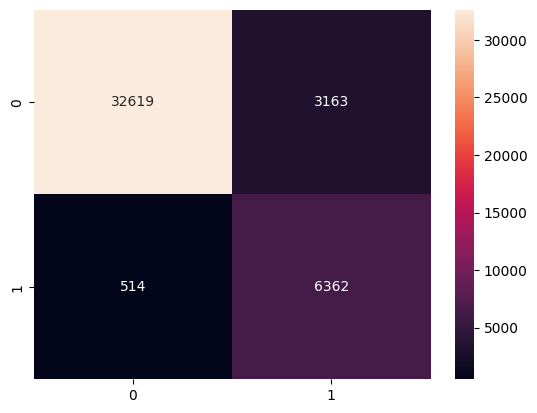

In [123]:
sns.heatmap(cm,annot = True,fmt='d')